<a href="https://colab.research.google.com/github/MikelBros/LSTM_Tutorial/blob/master/multivariate_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MULTIVARIATE LSTM

The idea here is to learn a model to map obeservations a subset of past observations from different variables but with the same timestaps, in order to predict the next value in the sequence.

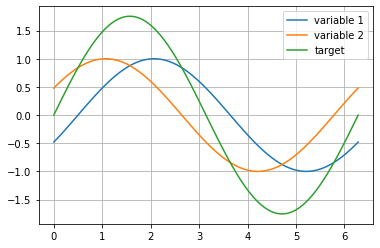

In [2]:
# multivariate lstm example
from numpy import array
from numpy import hstack
import numpy as np
from sklearn import metrics
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# We have created a function to print accuracy metrics which can be used
# to get accuracy metrics of all models in upcoming steps
def print_accuracy_report(y_test, y_pred):
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))


# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence
x = np.linspace(0, 2 * np.pi, 100)
raw_seq_a = np.sin(x-0.5)
raw_seq_b = np.sin(x+0.5)
out_seq = array([raw_seq_a[i]+raw_seq_b[i] for i in range(len(raw_seq_a))])
# convert to [rows, columns] structure
raw_seq_a = raw_seq_a.reshape((len(raw_seq_a), 1))
raw_seq_b = raw_seq_b.reshape((len(raw_seq_b), 1))
out_seq = out_seq.reshape((len(out_seq), 1))


plt.plot(x, raw_seq_a, label='variable 1')
plt.plot(x, raw_seq_b, label='variable 2')
plt.plot(x, out_seq, label='target')
#plt.scatter(x_, raw_seq_, color='blue', s=50, marker = '.')
#lt.scatter(x[23], raw_seq[23], color='red', s=50, marker = '.')
plt.grid()
plt.legend()

### Data packing

The data is aranged in columns, the first one is the time series from the first signal. The second one is the time series from the second signal

In [3]:
# horizontally stack columns
dataset = hstack((raw_seq_a, raw_seq_b, out_seq))

print(raw_seq_a[0:4])
print(raw_seq_b[0:4])
print(out_seq[0:4])

# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)

print(X.shape, y.shape)
print('Train subset:', X[0], '\tTarget:', y[0])
print('Train subset:', X[1], '\tTarget:', y[1])

[[-0.47942554]
 [-0.42280057]
 [-0.36447314]
 [-0.3046781 ]]
[[0.47942554]
 [0.53412003]
 [0.5866638 ]
 [0.63684529]]
[[0.        ]
 [0.11131945]
 [0.22219066]
 [0.33216718]]
(97, 3, 2) (97,)
Train subset: [[-0.47942554  0.47942554]
 [-0.42280057  0.53412003]
 [-0.36447314  0.5866638 ]] 	Target: 0.3321671837334994
Train subset: [[-0.42280057  0.53412003]
 [-0.36447314  0.5866638 ]
 [-0.3046781   0.63684529]] 	Target: 0.4408061880079639


## Test and evaluation

In [4]:
# split the sequence in a train and test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=42, 
                                                    test_size=0.2,
                                                    shuffle=True)

# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X_train, y_train, epochs=2000, verbose=0)

# check the accuracy of the model
yhat = model.predict(X_test, verbose=0)
print_accuracy_report(y_test, yhat)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








Mean Absolute Error: 0.000644604971443738


## Prediction demonstration

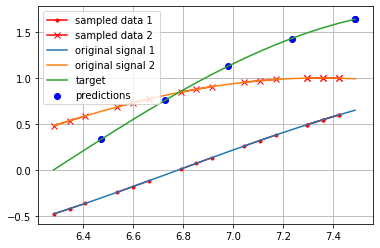

In [5]:
max_ = 20

# demonstrate predictions
for i in range(0, max_, (n_steps + 1)):
  # Notice that the training was peformed on data between [0, 2pi)!
  # The model has learned non-linear transform between the shifted sinus 
  # functions to a third sinus wave
  x = np.linspace(2 * np.pi, 4 * np.pi, 100)
  x_t = x[i:i+n_steps]
  input_a = raw_seq_a[i:i+n_steps]
  input_b = raw_seq_b[i:i+n_steps]
  input_ = hstack((input_a, input_b))
  plt.plot(x_t, input_a, color='red', marker = '.')
  plt.plot(x_t, input_b, color='red', marker = 'x')
  input_ = input_.reshape((1, n_steps, n_features))
  yhat = model.predict(input_, verbose=0)
  plt.scatter(x[i+n_steps], yhat, color='blue')
  
plt.scatter(x[i+n_steps], yhat, color='blue', label='predictions')
plt.plot(x_t, input_a, color='red', marker = '.', label='sampled data 1')
plt.plot(x_t, input_b, color='red', marker = 'x', label='sampled data 2')
plt.plot(x[0:max_], raw_seq_a[0:max_], label='original signal 1')
plt.plot(x[0:max_], raw_seq_b[0:max_], label='original signal 2')
plt.plot(x[0:max_], out_seq[0:max_], label='target')

plt.grid()
plt.legend()